In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
seaborn.set(style="ticks", color_codes=True)
import statistics
from statsmodels.stats import outliers_influence

#### Wczytanie i zapoznanie się z danymi

In [109]:
data = pd.read_csv('AGD_COMPLEX.csv', encoding = "ISO-8859-1")
data

,Rok,Kwartal,Miesiac,Tydzien,DzienT,Dzien,Data,Swieto,Produkt_ID,Kod,...,Kanal,Ilosc,Cena,cena_sprzedazy,Koszt_zm,Koszt_st,Marza_br,Promocja,Powiat_ID,Wojew_ID
0,2004,1,1,0,4,1,01 stycznia 2004,T,5,ER7448C,...,NaN,NaN,"952,00 z³",NaN,"0,0 z³","476,0 z³",NaN,NaN,6,1
1,2004,1,1,0,4,1,01 stycznia 2004,T,15,WM08A260PL,...,NaN,NaN,"1 359,00 z³",NaN,"0,0 z³","509,6 z³",NaN,NaN,6,1
2,2004,1,1,0,4,1,01 stycznia 2004,T,20,21PT182004,...,NaN,NaN,"685,00 z³",NaN,"0,0 z³","308,3 z³",NaN,NaN,6,1
3,2004,1,1,0,4,1,01 stycznia 2004,T,30,MHC-RG270,...,NaN,NaN,"758,00 z³",NaN,"0,0 z³","303,2 z³",NaN,NaN,6,1
4,2004,1,1,0,4,1,01 stycznia 2004,T,1,AC1103P,...,NaN,NaN,"770,00 z³",NaN,"0,0 z³","385,0 z³",NaN,NaN,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475961,2005,4,12,52,6,31,31 grudnia 2005,N,20,21PT182004,...,Internet,1.0,"685,00 z³","684,4 z³","143,8 z³","320,6 z³","540,5 z³",3.0%,379,5
475962,2005,4,12,52,6,31,31 grudnia 2005,N,22,21DM182,...,Internet,1.0,"677,00 z³","676,4 z³","121,9 z³","316,8 z³","554,5 z³",3.0%,379,5
475963,2005,4,12,52,6,31,31 grudnia 2005,N,22,21DM182,...,Internet,1.0,"677,00 z³","676,4 z³","121,9 z³","316,8 z³","554,5 z³",3.0%,379,5
475964,2005,4,12,52,6,31,31 grudnia 2005,N,24,UX-GD6,...,Internet,1.0,"862,00 z³","861,2 z³","129,3 z³","358,6 z³","731,9 z³",3.0%,379,5


In [3]:
print(data.dtypes)

Rok                   int64
Kwartal               int64
Miesiac               int64
Tydzien               int64
DzienT                int64
Dzien                 int64
Data                 object
Swieto               object
Produkt_ID            int64
Kod                  object
Producent            object
Grupa_produktowa     object
Kategoria            object
Miasto               object
Wojewodztwo          object
Region               object
Potencjal            object
Platnosc             object
Kanal                object
Ilosc               float64
Cena                 object
cena_sprzedazy       object
Koszt_zm             object
Koszt_st             object
Marza_br             object
Promocja             object
Powiat_ID             int64
Wojew_ID              int64
dtype: object


#### Analiza zmiennej 'Platnosc' 

In [4]:
data['Platnosc'].describe()

count      466058
unique          3
top       Gotówka
freq       190520
Name: Platnosc, dtype: object

In [5]:
data[data['Platnosc'].isna()]

,Rok,Kwartal,Miesiac,Tydzien,DzienT,Dzien,Data,Swieto,Produkt_ID,Kod,...,Kanal,Ilosc,Cena,cena_sprzedazy,Koszt_zm,Koszt_st,Marza_br,Promocja,Powiat_ID,Wojew_ID
0,2004,1,1,0,4,1,01 stycznia 2004,T,5,ER7448C,...,NaN,NaN,"952,00 z³",NaN,"0,0 z³","476,0 z³",NaN,NaN,6,1
1,2004,1,1,0,4,1,01 stycznia 2004,T,15,WM08A260PL,...,NaN,NaN,"1 359,00 z³",NaN,"0,0 z³","509,6 z³",NaN,NaN,6,1
2,2004,1,1,0,4,1,01 stycznia 2004,T,20,21PT182004,...,NaN,NaN,"685,00 z³",NaN,"0,0 z³","308,3 z³",NaN,NaN,6,1
3,2004,1,1,0,4,1,01 stycznia 2004,T,30,MHC-RG270,...,NaN,NaN,"758,00 z³",NaN,"0,0 z³","303,2 z³",NaN,NaN,6,1
4,2004,1,1,0,4,1,01 stycznia 2004,T,1,AC1103P,...,NaN,NaN,"770,00 z³",NaN,"0,0 z³","385,0 z³",NaN,NaN,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458137,2005,4,12,52,1,26,26 grudnia 2005,T,17,AV-21FT1S,...,NaN,NaN,"863,00 z³",NaN,"0,0 z³","403,9 z³",NaN,NaN,379,5
458138,2005,4,12,52,1,26,26 grudnia 2005,T,18,21FS2RLX,...,NaN,NaN,"750,00 z³",NaN,"0,0 z³","351,0 z³",NaN,NaN,379,5
458139,2005,4,12,52,1,26,26 grudnia 2005,T,19,TX21PZ1P,...,NaN,NaN,"831,00 z³",NaN,"0,0 z³","388,9 z³",NaN,NaN,379,5
458140,2005,4,12,52,1,26,26 grudnia 2005,T,20,21PT182004,...,NaN,NaN,"685,00 z³",NaN,"0,0 z³","320,6 z³",NaN,NaN,379,5


#### Określenie ile występuje brakującyh wartości w kolumnie 'Platnosc'. Patrząc na wartości kolumny 'Ilosc' można wnioskowac, że produkty z brakującą wartością w kolumnie 'Platnosc' się nie sprzedały.

In [6]:
data[data['Platnosc'].isna()].describe()

,Rok,Kwartal,Miesiac,Tydzien,DzienT,Dzien,Produkt_ID,Ilosc,Powiat_ID,Wojew_ID
count,9908.000000,9908.000000,9908.000000,9908.000000,9908.000000,9908.000000,9908.000000,0.0,9908.000000,9908.000000
mean,2004.506863,2.977089,8.186718,33.440856,4.296124,14.116875,9.173900,NaN,190.642410,8.272002
std,0.499978,1.152358,3.892942,17.815770,2.446916,10.624797,6.505065,NaN,109.104963,4.412078
min,2004.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,NaN,6.000000,1.000000
25%,2004.000000,2.000000,5.000000,18.000000,1.000000,1.000000,4.000000,NaN,114.000000,5.000000
50%,2005.000000,4.000000,11.000000,44.000000,5.000000,11.000000,8.000000,NaN,186.000000,7.000000
75%,2005.000000,4.000000,12.000000,52.000000,7.000000,26.000000,13.000000,NaN,274.000000,12.000000
max,2005.000000,4.000000,12.000000,52.000000,7.000000,28.000000,31.000000,NaN,379.000000,16.000000


In [7]:
data[data['Platnosc'] == 'Gotówka']

,Rok,Kwartal,Miesiac,Tydzien,DzienT,Dzien,Data,Swieto,Produkt_ID,Kod,...,Kanal,Ilosc,Cena,cena_sprzedazy,Koszt_zm,Koszt_st,Marza_br,Promocja,Powiat_ID,Wojew_ID
176,2004,1,1,0,5,2,02 stycznia 2004,N,1,AC1103P,...,Sklep,1.0,"770,00 z³","770,0 z³","269,5 z³","385,0 z³","500,5 z³",0.0%,6,1
177,2004,1,1,0,5,2,02 stycznia 2004,N,5,ER7448C,...,Sklep,1.0,"952,00 z³","952,0 z³","371,3 z³","476,0 z³","580,7 z³",0.0%,6,1
178,2004,1,1,0,5,2,02 stycznia 2004,N,10,ADP4425,...,Sklep,1.0,"1 069,00 z³","1 069,0 z³","470,4 z³","374,1 z³","598,6 z³",0.0%,6,1
179,2004,1,1,0,5,2,02 stycznia 2004,N,12,PDP1019/P,...,Sklep,1.0,"874,00 z³","874,0 z³","262,2 z³","415,2 z³","611,8 z³",0.0%,6,1
184,2004,1,1,0,5,2,02 stycznia 2004,N,1,AC1103P,...,Internet,1.0,"770,00 z³","746,9 z³","269,5 z³","385,0 z³","477,4 z³",3.0%,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475648,2005,4,12,52,6,31,31 grudnia 2005,N,13,PDP619/P,...,Sklep,1.0,"696,00 z³","696,0 z³","208,8 z³","317,4 z³","487,2 z³",0.0%,337,12
475649,2005,4,12,52,6,31,31 grudnia 2005,N,13,PDP619/P,...,Sklep,1.0,"696,00 z³","696,0 z³","208,8 z³","317,4 z³","487,2 z³",0.0%,337,12
475650,2005,4,12,52,6,31,31 grudnia 2005,N,15,WM08A260PL,...,Sklep,1.0,"1 359,00 z³","1 359,0 z³","516,4 z³","489,2 z³","842,6 z³",0.0%,337,12
475651,2005,4,12,52,6,31,31 grudnia 2005,N,15,WM08A260PL,...,Sklep,1.0,"1 359,00 z³","1 359,0 z³","516,4 z³","489,2 z³","842,6 z³",0.0%,337,12


In [8]:
data[data['Platnosc'] == 'Gotówka'].isnull().values.any()

False

In [9]:
data[data['Platnosc'] == 'Karta'].isnull().values.any()

False

#### Usuwanie rekordów z brakującą wartością w kolumnie 'Platnosc'.

In [110]:
data = data[data['Platnosc'].notna()]
data

,Rok,Kwartal,Miesiac,Tydzien,DzienT,Dzien,Data,Swieto,Produkt_ID,Kod,...,Kanal,Ilosc,Cena,cena_sprzedazy,Koszt_zm,Koszt_st,Marza_br,Promocja,Powiat_ID,Wojew_ID
176,2004,1,1,0,5,2,02 stycznia 2004,N,1,AC1103P,...,Sklep,1.0,"770,00 z³","770,0 z³","269,5 z³","385,0 z³","500,5 z³",0.0%,6,1
177,2004,1,1,0,5,2,02 stycznia 2004,N,5,ER7448C,...,Sklep,1.0,"952,00 z³","952,0 z³","371,3 z³","476,0 z³","580,7 z³",0.0%,6,1
178,2004,1,1,0,5,2,02 stycznia 2004,N,10,ADP4425,...,Sklep,1.0,"1 069,00 z³","1 069,0 z³","470,4 z³","374,1 z³","598,6 z³",0.0%,6,1
179,2004,1,1,0,5,2,02 stycznia 2004,N,12,PDP1019/P,...,Sklep,1.0,"874,00 z³","874,0 z³","262,2 z³","415,2 z³","611,8 z³",0.0%,6,1
180,2004,1,1,0,5,2,02 stycznia 2004,N,2,AZ2102P,...,Sklep,1.0,"922,00 z³","922,0 z³","322,7 z³","461,0 z³","599,3 z³",0.0%,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475961,2005,4,12,52,6,31,31 grudnia 2005,N,20,21PT182004,...,Internet,1.0,"685,00 z³","684,4 z³","143,8 z³","320,6 z³","540,5 z³",3.0%,379,5
475962,2005,4,12,52,6,31,31 grudnia 2005,N,22,21DM182,...,Internet,1.0,"677,00 z³","676,4 z³","121,9 z³","316,8 z³","554,5 z³",3.0%,379,5
475963,2005,4,12,52,6,31,31 grudnia 2005,N,22,21DM182,...,Internet,1.0,"677,00 z³","676,4 z³","121,9 z³","316,8 z³","554,5 z³",3.0%,379,5
475964,2005,4,12,52,6,31,31 grudnia 2005,N,24,UX-GD6,...,Internet,1.0,"862,00 z³","861,2 z³","129,3 z³","358,6 z³","731,9 z³",3.0%,379,5


#### Sprawdzanie, czy nie ma innych brakujących wartości.

In [111]:
data.isnull().values.any()

False

#### Ekstrakcja liczbowej wartości ceny sprzedaży, zapisanie jej do zmiennej 'cena_f'.

In [12]:
data['cena_sprzedazy'].describe()

count       466058
unique         597
top       770,0 z³
freq         25862
Name: cena_sprzedazy, dtype: object

In [77]:
data.describe()

,Rok,Kwartal,Miesiac,Tydzien,DzienT,Dzien,Produkt_ID,Ilosc,Powiat_ID,Wojew_ID,cena_f
count,466058.000000,466058.000000,466058.000000,466058.000000,466058.000000,466058.000000,466058.000000,466058.0,466058.000000,466058.000000,466058.000000
mean,2004.572384,3.061984,8.425005,34.782969,3.988059,16.886742,7.551888,1.0,184.493136,8.122783,1123.228280
std,0.494733,1.066276,3.419741,15.057585,1.967093,8.505775,5.897410,0.0,104.131376,4.316985,370.146287
min,2004.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.0,6.000000,1.000000,555.100000
25%,2004.000000,2.000000,6.000000,22.000000,2.000000,10.000000,3.000000,1.0,114.000000,5.000000,808.500000
50%,2005.000000,3.000000,9.000000,39.000000,4.000000,17.000000,6.000000,1.0,152.000000,7.000000,968.100000
75%,2005.000000,4.000000,12.000000,49.000000,6.000000,24.000000,11.000000,1.0,266.000000,12.000000,1359.000000
max,2005.000000,4.000000,12.000000,52.000000,7.000000,31.000000,31.000000,1.0,379.000000,16.000000,1992.900000


In [112]:
data['cena_f'] = data['cena_sprzedazy'].str.replace('\s', '')
data['cena_f']

C:\Users\Dream Machines\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


176        770,0z³
177        952,0z³
178       1069,0z³
179        874,0z³
180        922,0z³
            ...   
475961     684,4z³
475962     676,4z³
475963     676,4z³
475964     861,2z³
475965     747,3z³
Name: cena_f, Length: 466058, dtype: object

In [113]:
data['cena_f'] = data['cena_f'].str.replace('z³', '')
data['cena_f'] = data['cena_f'].str.replace(',', '.')
data['cena_f'] = pd.to_numeric(data['cena_f'])
data['cena_f']

C:\Users\Dream Machines\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dream Machines\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Dream Machines\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

176        770.0
177        952.0
178       1069.0
179        874.0
180        922.0
           ...  
475961     684.4
475962     676.4
475963     676.4
475964     861.2
475965     747.3
Name: cena_f, Length: 466058, dtype: float64

In [16]:
data['cena_f'].describe()

count    466058.000000
mean       1123.228280
std         370.146287
min         555.100000
25%         808.500000
50%         968.100000
75%        1359.000000
max        1992.900000
Name: cena_f, dtype: float64

In [26]:
rodzaje_platnosci = data['Platnosc'].unique()
rodzaje_platnosci

array(['Gotówka', 'Karta', 'Kredyt'], dtype=object)

#### Nazwy kolumn dla wyjściowej ramki danych.

In [17]:
column_names = ['Grupa produktowa', 'Forma Płatności', 'Województwo', 'Miesiąc i rok transakcji', 'Sprzedaż (średnia)', 'Sprzedaż (mediana)', 'Sprzedaż (minimum)', 'Sprzedaż (maksimum)', 'Sprzedaż (odchylenie standardowe)']

In [21]:
print(data.dtypes)

Rok                   int64
Kwartal               int64
Miesiac               int64
Tydzien               int64
DzienT                int64
Dzien                 int64
Data                 object
Swieto               object
Produkt_ID            int64
Kod                  object
Producent            object
Grupa_produktowa     object
Kategoria            object
Miasto               object
Wojewodztwo          object
Region               object
Potencjal            object
Platnosc             object
Kanal                object
Ilosc               float64
Cena                 object
cena_sprzedazy       object
Koszt_zm             object
Koszt_st             object
Marza_br             object
Promocja             object
Powiat_ID             int64
Wojew_ID              int64
cena_f              float64
dtype: object


In [22]:
data['Grupa_produktowa'].describe()

count      466058
unique          5
top       Lodówki
freq       210777
Name: Grupa_produktowa, dtype: object

In [23]:
grupy_produktowe = data['Grupa_produktowa'].unique()
grupy_produktowe

array(['Lodówki', 'Zmywarki', 'Pralki', 'Telewizory', 'Hi-Fi'],
      dtype=object)

In [39]:
result_df = pd.DataFrame(columns = column_names)
result_df

,Grupa produktowa,Forma Płatności,Województwo,Miesiąc i rok transakcji,Sprzedaż (średnia),Sprzedaż (mediana),Sprzedaż (minimum),Sprzedaż (maksimum),Sprzedaż (odchylenie standardowe)


#### Tworzenie wyjściowej ramki danych poprzez wycinanie części ramki temp_df i zapisywanie wymaganych atrybutów do rekordu wyjściowej ramki danych.

In [40]:
for gr_prod in grupy_produktowe:
    for platnosc in rodzaje_platnosci:
        for wojew_ID in range(1, 17):
            for rok in range(2004, 2006):
                for miesiac in range(1, 13):
                    temp_df = data.loc[(data['Grupa_produktowa'] == gr_prod) & (data['Platnosc'] == platnosc) \
                             & (data['Wojew_ID'] == wojew_ID) & (data['Rok'] == rok) & (data['Miesiac'] == miesiac)]
                    if not temp_df.empty:
                        result_df = result_df.append({'Grupa produktowa': gr_prod, 'Forma Płatności': platnosc, \
                                                      'Województwo': wojew_ID, \
                                                      'Miesiąc i rok transakcji':str(miesiac)+'.'+str(rok), \
                                                      'Sprzedaż (średnia)': temp_df.loc[:,'cena_f'].mean(), \
                                                      'Sprzedaż (mediana)': temp_df.loc[:,'cena_f'].median(), \
                                                      'Sprzedaż (minimum)': min(temp_df.loc[:,'cena_f']), \
                                                      'Sprzedaż (maksimum)': max(temp_df.loc[:,'cena_f']), \
                                                      'Sprzedaż (odchylenie standardowe)': np.std(temp_df.loc[:,'cena_f'])}, \
                                                    ignore_index=True)

In [41]:
result_df

,Grupa produktowa,Forma Płatności,Województwo,Miesiąc i rok transakcji,Sprzedaż (średnia),Sprzedaż (mediana),Sprzedaż (minimum),Sprzedaż (maksimum),Sprzedaż (odchylenie standardowe)
0,Lodówki,Gotówka,1,1.2004,963.923358,829.8,693.0,1675.0,325.240503
1,Lodówki,Gotówka,1,2.2004,978.508805,811.0,746.9,1675.0,331.834770
2,Lodówki,Gotówka,1,3.2004,985.274444,922.0,746.9,1675.0,315.847429
3,Lodówki,Gotówka,1,4.2004,983.198268,811.0,746.9,1675.0,328.792577
4,Lodówki,Gotówka,1,5.2004,922.758608,802.1,646.8,1675.0,306.809560
...,...,...,...,...,...,...,...,...,...
4555,Hi-Fi,Kredyt,16,6.2005,862.000000,862.0,862.0,862.0,0.000000
4556,Hi-Fi,Kredyt,16,9.2005,800.500000,800.5,748.0,853.0,52.500000
4557,Hi-Fi,Kredyt,16,10.2005,859.000000,862.0,853.0,862.0,4.242641
4558,Hi-Fi,Kredyt,16,11.2005,805.000000,805.0,748.0,862.0,57.000000


In [42]:
result_df.describe()

,Sprzedaż (średnia),Sprzedaż (mediana),Sprzedaż (minimum),Sprzedaż (maksimum),Sprzedaż (odchylenie standardowe)
count,4560.000000,4560.000000,4560.000000,4560.000000,4560.000000
mean,1031.873160,977.686031,774.833487,1446.580658,226.770396
std,233.099773,237.871172,156.211718,429.565881,144.536532
min,586.550000,586.550000,555.100000,590.800000,0.000000
25%,818.032941,810.300000,675.100000,970.000000,85.403801
50%,977.477460,871.600000,728.300000,1675.000000,249.825275
75%,1250.067833,1254.000000,831.000000,1799.400000,331.534349
max,1898.000000,1898.000000,1898.000000,1992.900000,601.000000


In [181]:
result_df.to_csv('tabela_podsumowan_Jakub_Majcher.csv')

#### Graficzna analiza danych. Grupa produktowa wyrażnie wpływa na cenę sprzedaży.

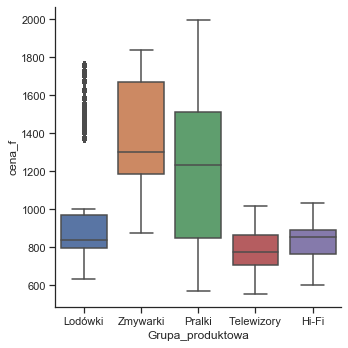

In [49]:
sns.catplot(x="Grupa_produktowa", y="cena_f", kind="box", data=data);

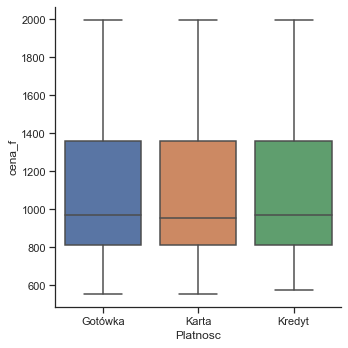

In [53]:
sns.catplot(x="Platnosc", y="cena_f", kind="box", data=data);

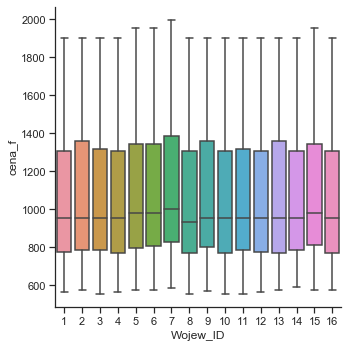

In [55]:
sns.catplot(x="Wojew_ID", y="cena_f", kind="box", data=data);

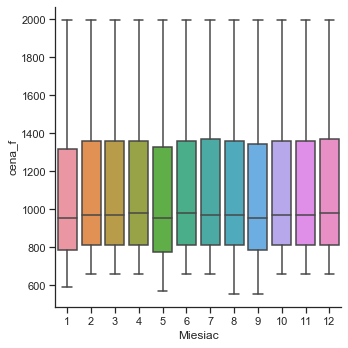

In [56]:
sns.catplot(x="Miesiac", y="cena_f", kind="box", data=data);

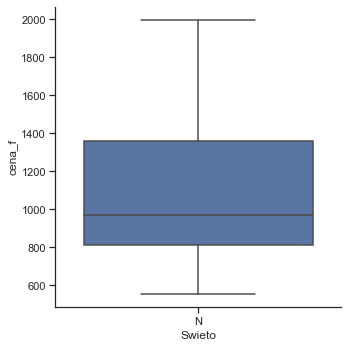

In [57]:
sns.catplot(x="Swieto", y="cena_f", kind="box", data=data);

In [58]:
data['Swieto'].describe()

count     466058
unique         1
top            N
freq      466058
Name: Swieto, dtype: object

#### Zmienna 'Producent' ma najsilniejszy wpływ na zmiany w cenie sprzedaży.

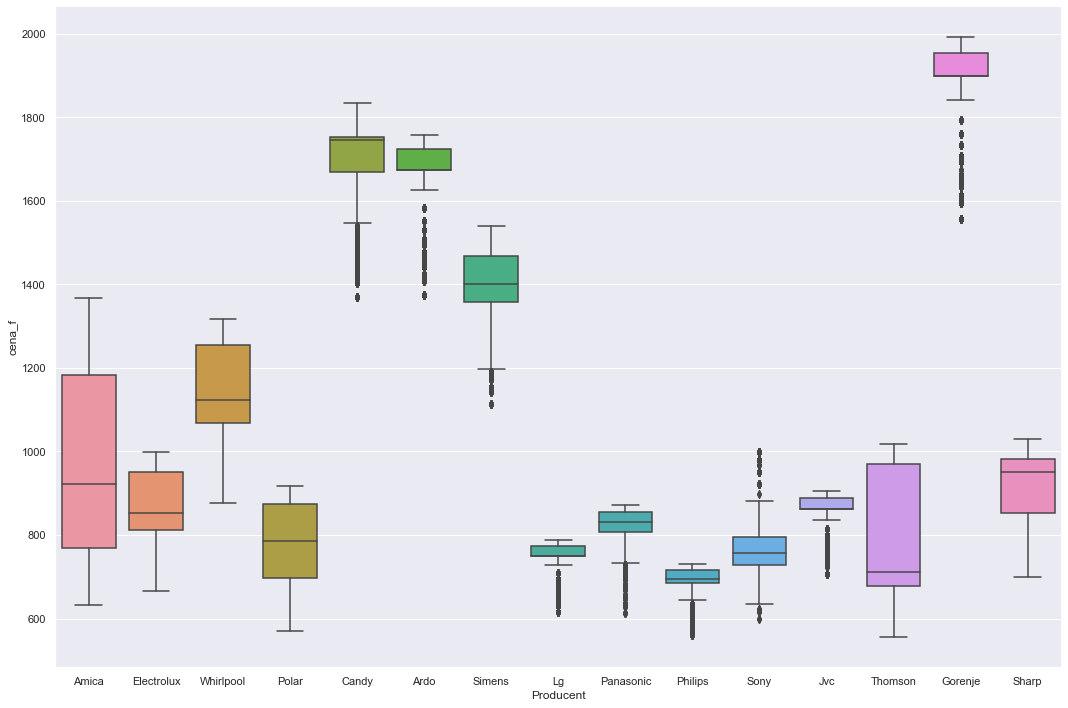

In [73]:
sns.catplot(x="Producent", y="cena_f", kind="box", data=data, height = 10, aspect = 1.5/1);

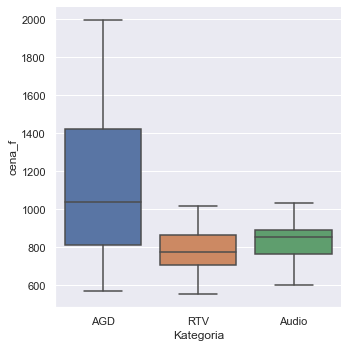

In [75]:
sns.catplot(x="Kategoria", y="cena_f", kind="box", data=data);

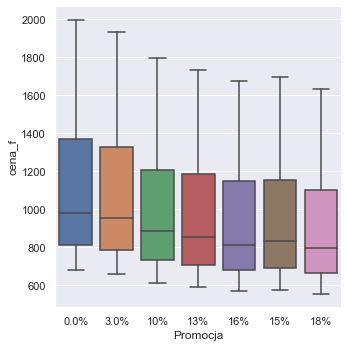

In [76]:
sns.catplot(x="Promocja", y="cena_f", kind="box", data=data);

C:\Users\Dream Machines\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Dream Machines\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0, flags=flags)


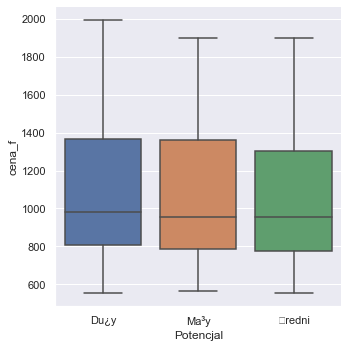

In [78]:
sns.catplot(x="Potencjal", y="cena_f", kind="box", data=data);

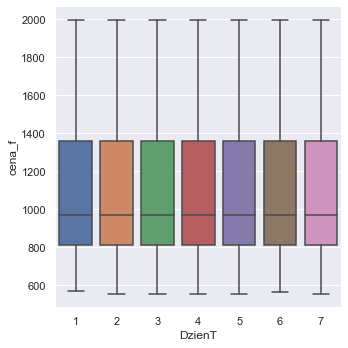

In [79]:
sns.catplot(x="DzienT", y="cena_f", kind="box", data=data);

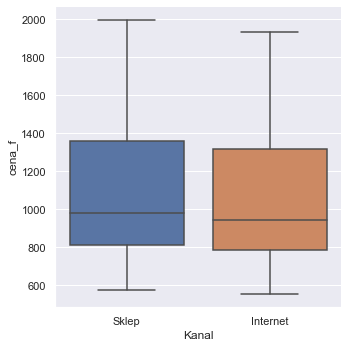

In [80]:
sns.catplot(x="Kanal", y="cena_f", kind="box", data=data);

#### Po analizie graficznej zmiennych kategorycznych mozna stwierdzić, że największy wpływ na cenę mają zmienne 'Producent' i 'Grupa_produktowa'. Mniejszy wpływ mają zmienne 'Wojewodztwo' i 'Miesiac'. Inne zmienne nie mają zbytniego wpływu na cenę. Zmiennej 'Kategoria' nie uwzględniam z powodu zbyt dużego skorelowania ze zmienną 'Grupa_produktowa'.

#### Analiza zmiennych numerycznych

In [85]:
data['Koszt_zm'].describe()

count       466058
unique          31
top       269,5 z³
freq         74257
Name: Koszt_zm, dtype: object

In [114]:
data['koszt_zm_f'] = data['Koszt_zm'].str.replace('\s', '')
data['koszt_zm_f'] = data['koszt_zm_f'].str.replace('z³', '')
data['koszt_zm_f'] = data['koszt_zm_f'].str.replace(',', '.')
data['koszt_zm_f'] = pd.to_numeric(data['koszt_zm_f'])
data['koszt_zm_f']

C:\Users\Dream Machines\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dream Machines\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Dream Machines\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

176       269.5
177       371.3
178       470.4
179       262.2
180       322.7
          ...  
475961    143.8
475962    121.9
475963    121.9
475964    129.3
475965    112.2
Name: koszt_zm_f, Length: 466058, dtype: float64

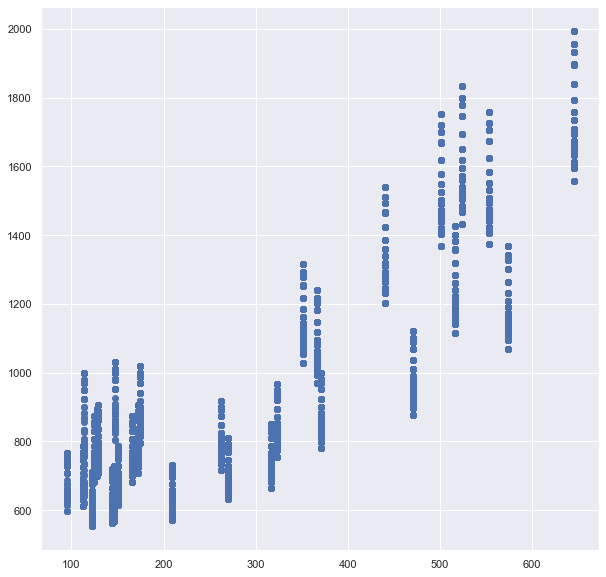

In [91]:
plt.figure(figsize = (10, 10))
plt.scatter(data['koszt_zm_f'], data['cena_f'])
plt.show()

In [115]:
data['koszt_st_f'] = data['Koszt_st'].str.replace('\s', '')
data['koszt_st_f'] = data['koszt_st_f'].str.replace('z³', '')
data['koszt_st_f'] = data['koszt_st_f'].str.replace(',', '.')
data['koszt_st_f'] = pd.to_numeric(data['koszt_st_f'])
data['koszt_st_f']

C:\Users\Dream Machines\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dream Machines\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Dream Machines\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

176       385.0
177       476.0
178       374.1
179       415.2
180       461.0
          ...  
475961    320.6
475962    316.8
475963    316.8
475964    358.6
475965    311.2
Name: koszt_st_f, Length: 466058, dtype: float64

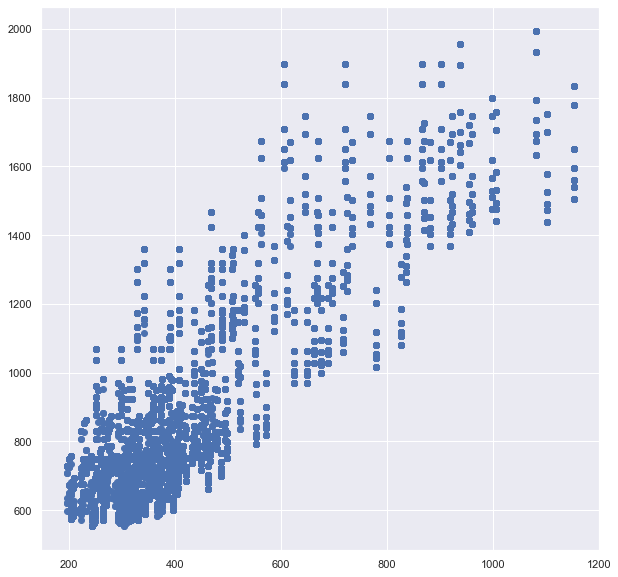

In [92]:
plt.figure(figsize = (10, 10))
plt.scatter(data['koszt_st_f'], data['cena_f'])
plt.show()

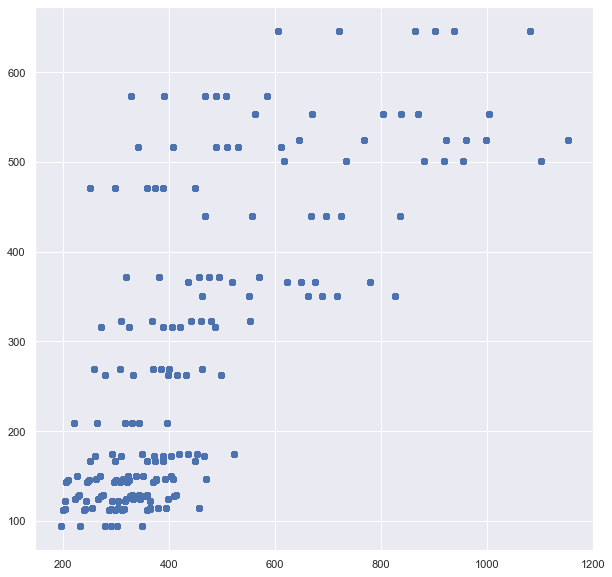

In [93]:
plt.figure(figsize = (10, 10))
plt.scatter(data['koszt_st_f'], data['koszt_zm_f'])
plt.show()

#### Aby uniknąć problemów z korelacją zmiennych postanowiłem koszt stały i koszt zmienny przekształcić w zmienną koszt, będącą ich sumą.

In [116]:
data['koszty'] = data['koszt_st_f'] + data['koszt_zm_f']

C:\Users\Dream Machines\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


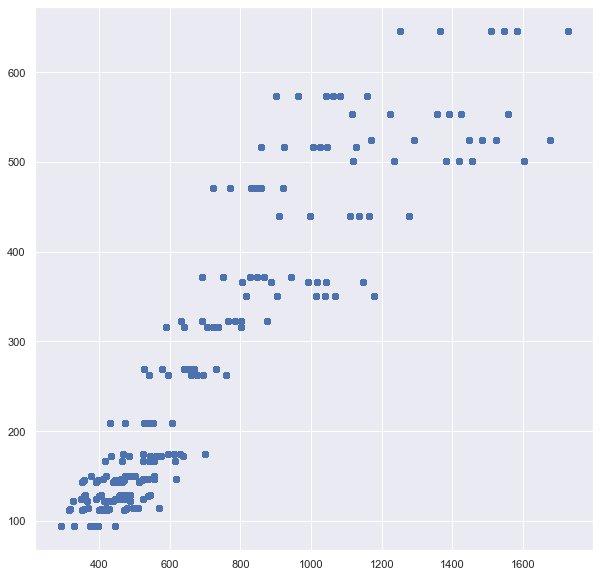

In [97]:
plt.figure(figsize = (10, 10))
plt.scatter(data['koszty'], data['koszt_zm_f'])
plt.show()

In [117]:
data['Miesiac'] = data['Miesiac'].astype('category')

C:\Users\Dream Machines\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Aby użyć danych kategorycznych w regresji liniowej potrzebne jest stworzenie tzw. 'dummy variables' przyjmujących wartości 0 lub 1 w kolumnach oznaczających daną kategorię. Na n kategorii towrzy się n-1 'dummies', aby unknąć korelacji między zmiennymi.

In [118]:
data_w_dummies = pd.get_dummies(data[['Producent', 'Grupa_produktowa', 'Wojewodztwo', 'Miesiac']], drop_first=True)
data_w_dummies.columns

Index(['Producent_Ardo', 'Producent_Candy', 'Producent_Electrolux',
       'Producent_Gorenje', 'Producent_Jvc', 'Producent_Lg',
       'Producent_Panasonic', 'Producent_Philips', 'Producent_Polar',
       'Producent_Sharp', 'Producent_Simens', 'Producent_Sony',
       'Producent_Thomson', 'Producent_Whirlpool', 'Grupa_produktowa_Lodówki',
       'Grupa_produktowa_Pralki', 'Grupa_produktowa_Telewizory',
       'Grupa_produktowa_Zmywarki', 'Wojewodztwo_Kujawsko-Pomorskie',
       'Wojewodztwo_Lubelskie', 'Wojewodztwo_Lubuskie',
       'Wojewodztwo_Mazowieckie', 'Wojewodztwo_Ma³opolskie',
       'Wojewodztwo_Opolskie', 'Wojewodztwo_Podkarpackie',
       'Wojewodztwo_Podlaskie', 'Wojewodztwo_Pomorskie',
       'Wojewodztwo_Warmiñsko-Mazurskie', 'Wojewodztwo_Wielkopolskie',
       'Wojewodztwo_Zachodniopomorskie', 'Wojewodztwo_l¹skie',
       'Wojewodztwo_wiêtokrzyskie', 'Wojewodztwo_£ódzkie', 'Miesiac_2',
       'Miesiac_3', 'Miesiac_4', 'Miesiac_5', 'Miesiac_6', 'Miesiac_7',
       'Mi

In [119]:
data = pd.concat([data, data_w_dummies], axis=1)

#### Obliczanie wskaźnika VIF (Variance Inflation Factor) informującego nas o współzależnościach między zmiennymi.

In [125]:
y = data['cena_f']
x = data[['koszty', 'Producent_Ardo', 'Producent_Candy', 'Producent_Electrolux',
       'Producent_Gorenje', 'Producent_Jvc', 'Producent_Lg',
       'Producent_Panasonic', 'Producent_Philips', 'Producent_Polar',
       'Producent_Sharp', 'Producent_Simens', 'Producent_Sony',
       'Producent_Thomson', 'Producent_Whirlpool', 'Grupa_produktowa_Lodówki',
       'Grupa_produktowa_Pralki', 'Grupa_produktowa_Telewizory',
       'Grupa_produktowa_Zmywarki', 'Miesiac_2',
       'Miesiac_3', 'Miesiac_4', 'Miesiac_5', 'Miesiac_6', 'Miesiac_7',
       'Miesiac_8', 'Miesiac_9', 'Miesiac_10', 'Miesiac_11', 'Miesiac_12']]
x = sm.add_constant(x)
pd.Series([outliers_influence.variance_inflation_factor(x.values, i) 
               for i in range(x.shape[1])], 
              index=x.columns)

const                           0.000000
koszty                         10.179192
Producent_Ardo                  4.377930
Producent_Candy                 3.178126
Producent_Electrolux            1.458095
Producent_Gorenje                    inf
Producent_Jvc                        inf
Producent_Lg                         inf
Producent_Panasonic                  inf
Producent_Philips                    inf
Producent_Polar                      inf
Producent_Sharp                      inf
Producent_Simens                     inf
Producent_Sony                       inf
Producent_Thomson                    inf
Producent_Whirlpool             1.636080
Grupa_produktowa_Lodówki             inf
Grupa_produktowa_Pralki              inf
Grupa_produktowa_Telewizory     9.466765
Grupa_produktowa_Zmywarki            inf
Miesiac_2                       2.053866
Miesiac_3                       2.196996
Miesiac_4                       2.922375
Miesiac_5                       2.999876
Miesiac_6       

#### Tak jak się spodziewałem użycie jednocześnie zmiennych 'Producent' i 'Grupa_produktowa' wprowadza zbyt duże zależności między zmiennymi wejściowymi. Stworzone zostaną dwa modele, jeden wykorzystujący zmienną 'Producent', a drugi zmienną 'Grupa_produktowa'.

In [126]:
y = data['cena_f']
x = data[['koszty', 'Producent_Ardo', 'Producent_Candy', 'Producent_Electrolux',
       'Producent_Gorenje', 'Producent_Jvc', 'Producent_Lg',
       'Producent_Panasonic', 'Producent_Philips', 'Producent_Polar',
       'Producent_Sharp', 'Producent_Simens', 'Producent_Sony',
       'Producent_Thomson', 'Producent_Whirlpool', 'Miesiac_2',
       'Miesiac_3', 'Miesiac_4', 'Miesiac_5', 'Miesiac_6', 'Miesiac_7',
       'Miesiac_8', 'Miesiac_9', 'Miesiac_10', 'Miesiac_11', 'Miesiac_12']]
x = sm.add_constant(x)
pd.Series([outliers_influence.variance_inflation_factor(x.values, i) 
               for i in range(x.shape[1])], 
              index=x.columns)

const                   65.827254
koszty                   5.336013
Producent_Ardo           2.257985
Producent_Candy          3.057497
Producent_Electrolux     1.200935
Producent_Gorenje        1.766380
Producent_Jvc            1.111299
Producent_Lg             1.100222
Producent_Panasonic      1.113733
Producent_Philips        1.142730
Producent_Polar          1.236057
Producent_Sharp          1.024731
Producent_Simens         1.216913
Producent_Sony           1.025716
Producent_Thomson        1.071497
Producent_Whirlpool      1.194006
Miesiac_2                2.053809
Miesiac_3                2.196917
Miesiac_4                2.922355
Miesiac_5                2.999857
Miesiac_6                3.106955
Miesiac_7                2.283074
Miesiac_8                2.247987
Miesiac_9                3.691253
Miesiac_10               4.017108
Miesiac_11               3.744063
Miesiac_12               7.076437
dtype: float64

#### Normalizacja zmiennej wyjściowej i numerycznej zmiennej wejściowej w celu zmniejszenia zależności między zmiennymi wejśćiowymi.

In [128]:
max_koszt = data['koszty'].max()
min_koszt = data['koszty'].min()
data['koszty_n'] = (data['koszty'] - min_koszt)/(max_koszt - min_koszt)
data['koszty_n'].describe()

count    466058.000000
mean          0.437625
std           0.228215
min           0.000000
25%           0.263924
50%           0.385478
75%           0.574213
max           1.000000
Name: koszty_n, dtype: float64

In [131]:
max_cena = data['cena_f'].max()
min_cena = data['cena_f'].min()
data['cena_n'] = (data['cena_f'] - min_cena)/(max_cena - min_cena)
data['cena_n'].describe()

count    466058.000000
mean          0.395137
std           0.257439
min           0.000000
25%           0.176241
50%           0.287244
75%           0.559118
max           1.000000
Name: cena_n, dtype: float64

In [132]:
y = data['cena_n']
x = data[['koszty_n', 'Producent_Ardo', 'Producent_Candy', 'Producent_Electrolux',
       'Producent_Gorenje', 'Producent_Jvc', 'Producent_Lg',
       'Producent_Panasonic', 'Producent_Philips', 'Producent_Polar',
       'Producent_Sharp', 'Producent_Simens', 'Producent_Sony',
       'Producent_Thomson', 'Producent_Whirlpool', 'Miesiac_2',
       'Miesiac_3', 'Miesiac_4', 'Miesiac_5', 'Miesiac_6', 'Miesiac_7',
       'Miesiac_8', 'Miesiac_9', 'Miesiac_10', 'Miesiac_11', 'Miesiac_12']]
x = sm.add_constant(x)
pd.Series([outliers_influence.variance_inflation_factor(x.values, i) 
               for i in range(x.shape[1])], 
              index=x.columns)

const                   46.629022
koszty_n                 5.336013
Producent_Ardo           2.257985
Producent_Candy          3.057497
Producent_Electrolux     1.200935
Producent_Gorenje        1.766380
Producent_Jvc            1.111299
Producent_Lg             1.100222
Producent_Panasonic      1.113733
Producent_Philips        1.142730
Producent_Polar          1.236057
Producent_Sharp          1.024731
Producent_Simens         1.216913
Producent_Sony           1.025716
Producent_Thomson        1.071497
Producent_Whirlpool      1.194006
Miesiac_2                2.053809
Miesiac_3                2.196917
Miesiac_4                2.922355
Miesiac_5                2.999857
Miesiac_6                3.106955
Miesiac_7                2.283074
Miesiac_8                2.247987
Miesiac_9                3.691253
Miesiac_10               4.017108
Miesiac_11               3.744063
Miesiac_12               7.076437
dtype: float64

In [139]:
y = data['cena_n']
x = data[['koszty_n', 'Producent_Ardo', 'Producent_Candy', 'Producent_Electrolux',
       'Producent_Gorenje', 'Producent_Jvc', 'Producent_Lg',
       'Producent_Panasonic', 'Producent_Philips', 'Producent_Polar',
       'Producent_Sharp', 'Producent_Simens', 'Producent_Sony',
       'Producent_Thomson', 'Producent_Whirlpool', 'Miesiac_2',
       'Miesiac_3', 'Miesiac_4', 'Miesiac_5', 'Miesiac_6', 'Miesiac_7',
       'Miesiac_8', 'Miesiac_9', 'Miesiac_10', 'Miesiac_11', 'Miesiac_12']]
x = sm.add_constant(x)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 cena_n   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                 3.313e+05
Date:                Mon, 11 May 2020   Prob (F-statistic):               0.00
Time:                        18:23:09   Log-Likelihood:             6.6309e+05
No. Observations:              466058   AIC:                        -1.326e+06
Df Residuals:                  466031   BIC:                        -1.326e+06
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0406      0.001    -69.560      0.000      -0.042      -0.039
koszty_n                 0.8296      0.001    959.280      0.000       0.828       0.831
Producent_Ardo           0.1638      0.000    336.225      0.000       0.163       0.165
Producent_Candy          0.1525      0.000    313.698      0.000       0.152       0.153
Producent_Electrolux    -0.0413      0.000   -153.570      0.000      -0.042      -0.041
Producent_Gorenje        0.2290      0.001    331.701      0.000       0.228       0.230
Producent_Jvc            0.0847      0.001    135.363      0.000       0.083       0.086
Producent_Lg             0.0383      0.001     51.006      0.000       0.037       0.040
Producent_Panasonic      0.0749      0.001    109.868      0.000       0.074       0.076
Producent_Philips        0.0154      0.001     22.248      0.000       0.014       0.017
Producent_Polar         -0.0051      0.000    -13.668      0.000      -0.006      -0.004
Producent_Sharp          0.1487      0.001    106.692      0.000       0.146       0.151
Producent_Simens         0.1588      0.000    347.512      0.000       0.158       0.160
Producent_Sony           0.1033      0.002     62.048      0.000       0.100       0.107
Producent_Thomson        0.0662      0.001     79.063      0.000       0.065       0.068
Producent_Whirlpool      0.0627      0.000    190.023      0.000       0.062       0.063
Miesiac_2                0.0345      0.001     52.373      0.000       0.033       0.036
Miesiac_3                0.0338      0.001     52.947      0.000       0.033       0.035
Miesiac_4                0.0373      0.001     64.278      0.000       0.036       0.038
Miesiac_5               -0.0072      0.001    -12.498      0.000      -0.008      -0.006
Miesiac_6                0.0374      0.001     65.432      0.000       0.036       0.039
Miesiac_7                0.0335      0.001     53.262      0.000       0.032       0.035
Miesiac_8                0.0188      0.001     29.666      0.000       0.018       0.020
Miesiac_9               -0.0028      0.001     -5.142      0.000      -0.004      -0.002
Miesiac_10               0.0394      0.001     72.584      0.000       0.038       0.040
Miesiac_11               0.0394      0.001     71.686      0.000       0.038       0.041
Miesiac_12               0.0290      0.001     57.253      0.000       0.028       0.030
==============================================================================
Omnibus:                    39132.223   Durbin-Watson:                   0.420
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65332.187
Skew:                           0.625   Prob(JB):                         0.00
Kurtosis:                       4.342   Cond. No.                         23.7
==================

In [138]:
y2 = data['cena_n']
x2 = data[['koszty_n', 'Grupa_produktowa_Lodówki',
       'Grupa_produktowa_Pralki', 'Grupa_produktowa_Telewizory',
       'Grupa_produktowa_Zmywarki', 'Miesiac_2',
       'Miesiac_3', 'Miesiac_4', 'Miesiac_5', 'Miesiac_6', 'Miesiac_7',
       'Miesiac_8', 'Miesiac_9', 'Miesiac_10', 'Miesiac_11', 'Miesiac_12']]
x2 = sm.add_constant(x2)
results2 = sm.OLS(y2,x2).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 cena_n   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 3.867e+05
Date:                Mon, 11 May 2020   Prob (F-statistic):               0.00
Time:                        18:23:02   Log-Likelihood:             5.9063e+05
No. Observations:              466058   AIC:                        -1.181e+06
Df Residuals:                  466041   BIC:                        -1.181e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.0448      0.001     46.871      0.000       0.043       0.047
koszty_n                        1.0964      0.001   2053.450      0.000       1.095       1.097
Grupa_produktowa_Lodówki       -0.1897      0.001   -235.547      0.000      -0.191      -0.188
Grupa_produktowa_Pralki        -0.1134      0.001   -134.595      0.000      -0.115      -0.112
Grupa_produktowa_Telewizory    -0.0753      0.001    -87.313      0.000      -0.077      -0.074
Grupa_produktowa_Zmywarki      -0.1514      0.001   -180.524      0.000      -0.153      -0.150
Miesiac_2                       0.0339      0.001     44.131      0.000       0.032       0.035
Miesiac_3                       0.0330      0.001     44.276      0.000       0.032       0.034
Miesiac_4                       0.0382      0.001     56.282      0.000       0.037       0.040
Miesiac_5                      -0.0065      0.001     -9.587      0.000      -0.008      -0.005
Miesiac_6                       0.0383      0.001     57.274      0.000       0.037       0.040
Miesiac_7                       0.0338      0.001     46.052      0.000       0.032       0.035
Miesiac_8                       0.0187      0.001     25.243      0.000       0.017       0.020
Miesiac_9                      -0.0013      0.001     -2.008      0.045      -0.003    -3.1e-05
Miesiac_10                      0.0412      0.001     64.996      0.000       0.040       0.042
Miesiac_11                      0.0411      0.001     63.911      0.000       0.040       0.042
Miesiac_12                      0.0265      0.001     44.803      0.000       0.025       0.028
==============================================================================
Omnibus:                    84969.490   Durbin-Watson:                   0.383
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           212683.897
Skew:                           1.015   Prob(JB):                         0.00
Kurtosis:                       5.614   Cond. No.                         26.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Jak widać z wartości R^2 i adj.R^2 model wykorzystujący zmienną 'Producent' jest lepszy, zostanie on zatem wybrany do dalszego testowania. 

In [140]:
target = data['cena_n']
inputs = data[['koszty_n', 'Producent_Ardo', 'Producent_Candy', 'Producent_Electrolux',
       'Producent_Gorenje', 'Producent_Jvc', 'Producent_Lg',
       'Producent_Panasonic', 'Producent_Philips', 'Producent_Polar',
       'Producent_Sharp', 'Producent_Simens', 'Producent_Sony',
       'Producent_Thomson', 'Producent_Whirlpool', 'Miesiac_2',
       'Miesiac_3', 'Miesiac_4', 'Miesiac_5', 'Miesiac_6', 'Miesiac_7',
       'Miesiac_8', 'Miesiac_9', 'Miesiac_10', 'Miesiac_11', 'Miesiac_12']]

#### Dzielenie zbioru danych na podzbiory do uczenia i testowania modelu.

In [141]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.2, random_state = 365)

In [143]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### y_hat- wartości estymowane zmiennej wyjściowej

In [144]:
y_hat = reg.predict(x_train)

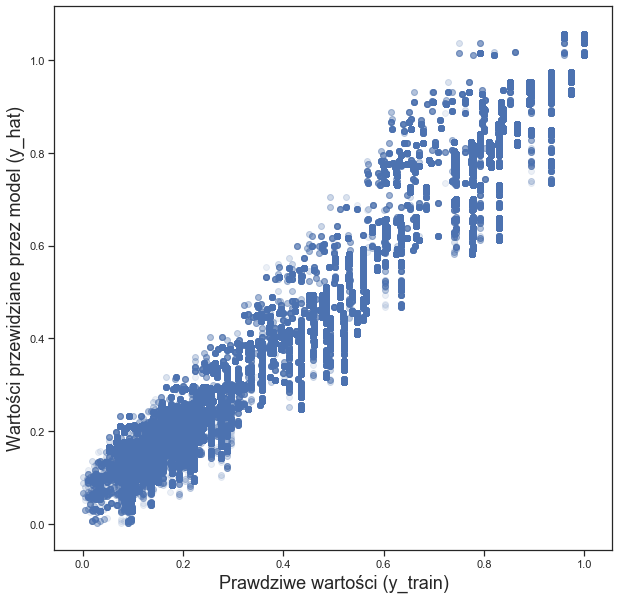

In [180]:
plt.figure(figsize = (10,10))
plt.scatter(y_train, y_hat, alpha = 0.1)
plt.xlabel('Prawdziwe wartości (y_train)', size = 18)
plt.ylabel('Wartości przewidziane przez model (y_hat)', size = 18)
plt.show()

#### Sprawdzanie założenia o normalności i stałej wariancji błędu.

Text(0.5, 1.0, 'Rozkład reszt')

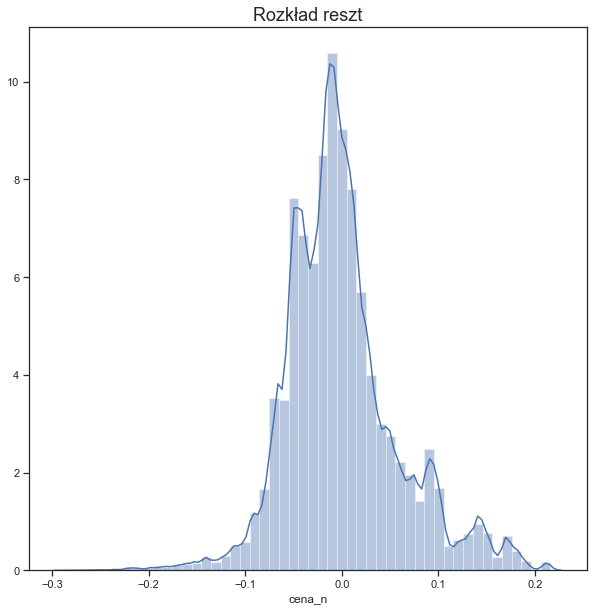

In [151]:
plt.figure(figsize = (10,10))
sns.distplot(y_train - y_hat)
plt.title('Rozkład reszt', size = 18)

#### Sprawdzanie ogólnej wydajności modelu

In [152]:
reg.score(x_train, y_train)

0.9485868755767127

In [153]:
reg.intercept_

-0.04046251738759371

In [154]:
reg.coef_

array([ 0.82978079,  0.16341512,  0.15285469, -0.04122128,  0.22889425,
        0.0848604 ,  0.03836412,  0.07507293,  0.01529816, -0.00499712,
        0.14948781,  0.15859951,  0.10279354,  0.0663899 ,  0.06273217,
        0.03467792,  0.0334598 ,  0.03688927, -0.00730911,  0.03715811,
        0.03331036,  0.01845341, -0.00300605,  0.03904751,  0.03887142,
        0.0287578 ])

#### Tworzenie tabeli współczynników do łatwiejszej analizy wpływu czynników na cenę sprzedarzy

In [155]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Zmienna wejściowa'])
reg_summary['Współczynnik'] = reg.coef_
reg_summary

,Zmienna wejściowa,Współczynnik
0,koszty_n,0.829781
1,Producent_Ardo,0.163415
2,Producent_Candy,0.152855
3,Producent_Electrolux,-0.041221
4,Producent_Gorenje,0.228894
5,Producent_Jvc,0.084860
6,Producent_Lg,0.038364
7,Producent_Panasonic,0.075073
8,Producent_Philips,0.015298
9,Producent_Polar,-0.004997


#### Testowanie modelu

In [156]:
y_hat_test = reg.predict(x_test)

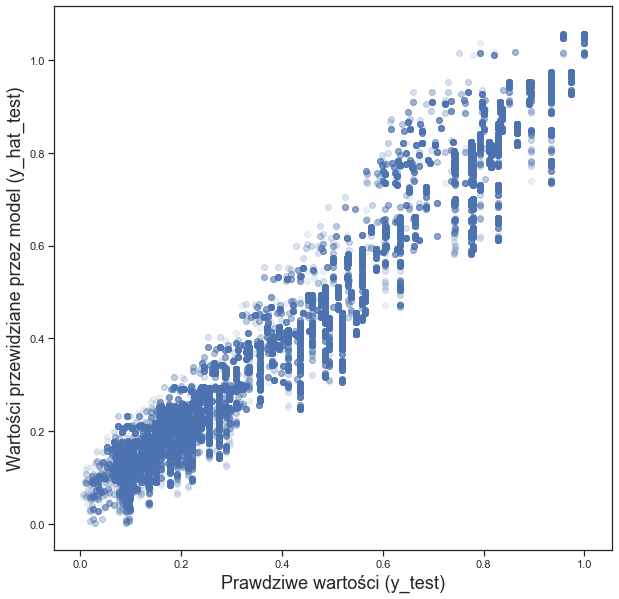

In [159]:
plt.figure(figsize = (10,10))
plt.scatter(y_test, y_hat_test, alpha = 0.1)
plt.xlabel('Prawdziwe wartości (y_test)', size = 18)
plt.ylabel('Wartości przewidziane przez model (y_hat_test)', size = 18)
plt.show()

#### Tworzenie tabeli analizującej błąd modelu

In [162]:
df_pf = pd.DataFrame((y_hat_test*(max_cena - min_cena) + min_cena), columns=['Wartość prognozowana'])
df_pf.head()

,Warość prognozowana
0,856.988320
1,1796.624648
2,749.994276
3,935.925497
4,773.207952


In [164]:
y_test = y_test.reset_index(drop=True)

In [165]:
df_pf['Wartość prawdziwa'] = (y_test*(max_cena - min_cena) + min_cena)
df_pf

,Warość prognozowana,Wartość prawdziwa
0,856.988320,810.3
1,1796.624648,1799.4
2,749.994276,770.0
3,935.925497,917.7
4,773.207952,806.1
...,...,...
93207,720.637264,770.0
93208,1736.160044,1529.5
93209,867.688814,769.3
93210,947.180241,922.0


#### Obliczanie błędu w złotówkach i w procentach

In [167]:
df_pf['Różnica'] = df_pf['Wartość prawdziwa'] - df_pf['Wartość prognozowana']

In [172]:
df_pf['Różnica %'] = np.absolute(df_pf['Różnica']/df_pf['Wartość prawdziwa']*100)
df_pf

,Wartość prognozowana,Wartość prawdziwa,Różnica,Różnica %
0,856.988320,810.3,-46.688320,5.761856
1,1796.624648,1799.4,2.775352,0.154238
2,749.994276,770.0,20.005724,2.598146
3,935.925497,917.7,-18.225497,1.985997
4,773.207952,806.1,32.892048,4.080393
...,...,...,...,...
93207,720.637264,770.0,49.362736,6.410745
93208,1736.160044,1529.5,-206.660044,13.511608
93209,867.688814,769.3,-98.388814,12.789395
93210,947.180241,922.0,-25.180241,2.731046


In [173]:
df_pf.describe()

,Wartość prognozowana,Wartość prawdziwa,Różnica,Różnica %
count,93212.000000,93212.000000,93212.000000,93212.000000
mean,1123.724967,1123.921134,0.196167,5.839521
std,360.801477,370.267217,83.623018,4.902850
min,558.328081,561.700000,-390.476064,0.001657
25%,851.528453,808.500000,-54.684004,1.812839
50%,971.801826,968.100000,-10.385693,4.384683
75%,1348.228735,1359.000000,36.387285,9.045377
max,2075.228472,1992.900000,310.723367,34.162310


In [178]:
df_pf.sort_values(by=['Różnica %']).tail(100)

,Wartość prognozowana,Wartość prawdziwa,Różnica,Różnica %
69650,858.641709,687.2,-171.441709,24.947862
75835,858.641709,687.2,-171.441709,24.947862
85901,1351.132072,1079.7,-271.432072,25.139583
53024,1351.132072,1079.7,-271.432072,25.139583
65279,777.656980,621.2,-156.456980,25.186249
66986,777.656980,621.2,-156.456980,25.186249
59259,1802.441089,1437.9,-364.541089,25.352326
31369,1802.441089,1437.9,-364.541089,25.352326
85296,852.454760,679.1,-173.354760,25.527133
23214,852.454760,679.1,-173.354760,25.527133
